Q.1

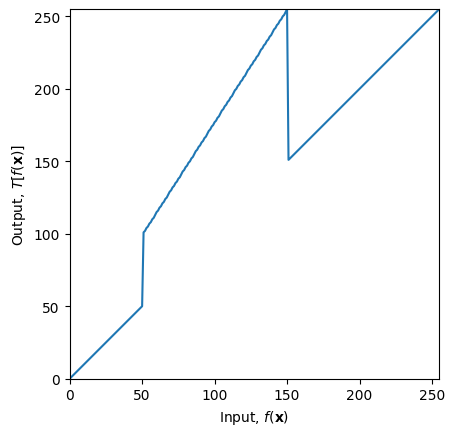

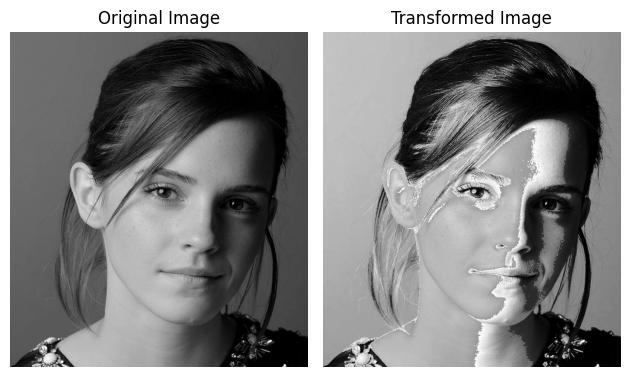

In [20]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

c = np.array([(50,50),(50,100),(150,255), (150, 150)])

#create the transform 
t1 = np.linspace(0, c[0, 1], c[0, 0] + 1 - 0).astype('uint8')
t2 = np.linspace(c[0, 1] + 1, c[1, 1], c[1, 0] - c[0, 0]).astype('uint8')
t3 = np.linspace(c[1, 1] + 1, c[2, 1], c[2, 0] - c[1, 0]).astype('uint8')
t4 = np.linspace(c[2, 1] + 1, c[3, 1], c[3, 0] - c[2, 0]).astype('uint8')
t5 = np.linspace(c[3, 1] + 1, 255, 255 - c[3, 0]).astype('uint8')

transform = np.concatenate((t1, t2), axis=0).astype('uint8')
transform = np.concatenate((transform, t3), axis=0).astype('uint8')
transform = np.concatenate((transform, t4), axis=0).astype('uint8')
transform = np.concatenate((transform, t5), axis=0).astype('uint8')


img_orig = cv.imread('../A01 Intensity Transformations and Neighborhood Filtering/images/emma.jpg', cv.IMREAD_GRAYSCALE)
#apply the transform
image_transformed = cv.LUT(img_orig, transform)


fig, ax = plt.subplots()
ax.plot(transform)
ax.set_xlabel(r'Input, $f(\mathbf{x})$')
ax.set_ylabel('Output, $T[f(\mathbf{x})]$')
ax.set_xlim(0, 255)
ax.set_ylim(0, 255)
ax.set_aspect('equal')
plt.savefig('transform.png')
plt.show()

fig, ax = plt.subplots(1,2)


# Display the original and transformed images
plt.subplot(1, 2, 1)
plt.imshow(img_orig, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image_transformed, cmap='gray')
plt.title('Transformed Image')
plt.axis('off')


plt.tight_layout()
plt.show()


Q.2 Brain (a) white matter

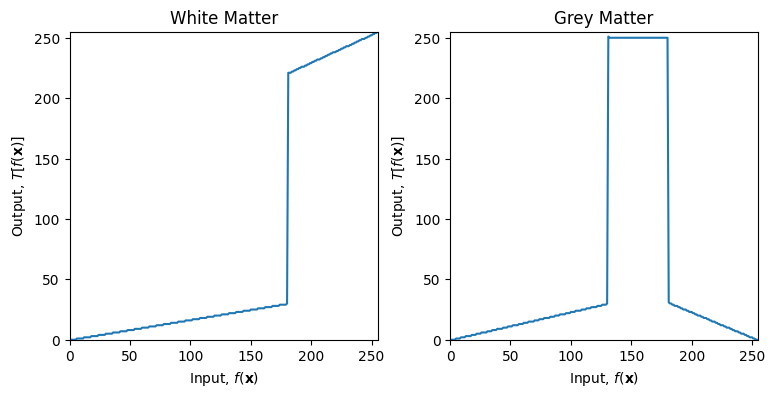

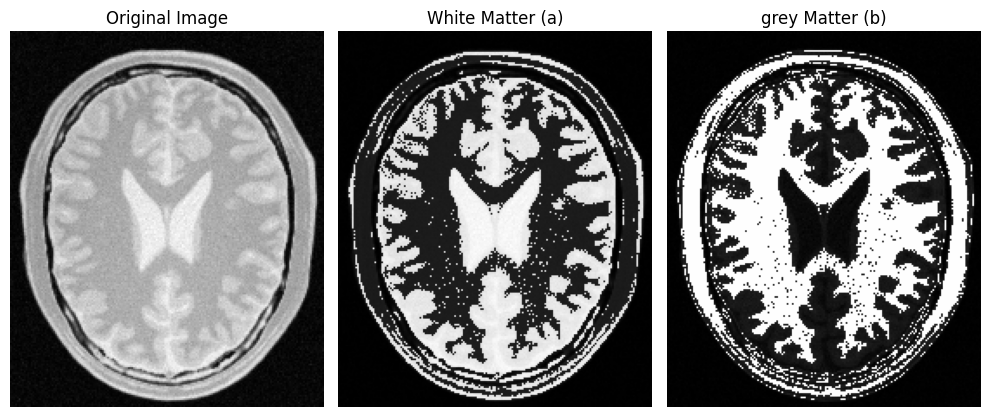

In [70]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

#create transform which shows white matter
c = np.array([(180,30),(180,220)])

t1 = np.linspace(0, c[0, 1], c[0, 0] + 1 - 0).astype('uint8')
t2 = np.linspace(c[0, 1] + 1, c[1, 1], c[1, 0] - c[0, 0]).astype('uint8')
t3 = np.linspace(c[1, 1] + 1, 255, 255 - c[1, 0]).astype('uint8')

transform = np.concatenate((t1, t2), axis=0).astype('uint8')
white_transform = np.concatenate((transform, t3), axis=0).astype('uint8')

#create transform which shows grey matter
c_ = np.array([(130,30),(130,250),(180,250), (180, 30),(255,0)])

t1_ = np.linspace(0, c_[0, 1], c_[0, 0] + 1 - 0).astype('uint8')
t2_ = np.linspace(c_[0, 1] + 1, c_[1, 1], c_[1, 0] - c_[0, 0]).astype('uint8')
t3_ = np.linspace(c_[1, 1] + 1, c_[2, 1], c_[2, 0] - c_[1, 0]).astype('uint8')
t4_ = np.linspace(c_[2, 1] + 1, c_[3, 1], c_[3, 0] - c_[2, 0]).astype('uint8')
t5_ = np.linspace(c_[3, 1] + 1, c_[4, 1], c_[4, 0] - c_[3, 0]).astype('uint8')

transform_ = np.concatenate((t1_, t2_), axis=0).astype('uint8')
transform_ = np.concatenate((transform_, t3_), axis=0).astype('uint8')
transform_ = np.concatenate((transform_, t4_), axis=0).astype('uint8')
grey_transform = np.concatenate((transform_, t5_), axis=0).astype('uint8')


img_orig = cv.imread('../A01 Intensity Transformations and Neighborhood Filtering/images/BrainProtonDensitySlice9.png', cv.IMREAD_GRAYSCALE)
#apply the transform
image_white_transformed = cv.LUT(img_orig, white_transform)
image_grey_transformed = cv.LUT(img_orig, grey_transform)

fig, ax = plt.subplots(1,2,figsize=(9,4))
ax[0].plot(white_transform)
ax[0].set_xlabel(r'Input, $f(\mathbf{x})$')
ax[0].set_ylabel('Output, $T[f(\mathbf{x})]$')
ax[0].set_title('White Matter')
ax[0].set_xlim(0, 255)
ax[0].set_ylim(0, 255)
ax[0].set_aspect('equal')


ax[1].plot(grey_transform)
ax[1].set_xlabel(r'Input, $f(\mathbf{x})$')
ax[1].set_ylabel('Output, $T[f(\mathbf{x})]$')
ax[1].set_title('Grey Matter')
ax[1].set_xlim(0, 255)
ax[1].set_ylim(0, 255)
ax[1].set_aspect('equal')

plt.show()

fig, ax = plt.subplots(1,3,figsize=(10,5))
# Display the original and transformed images
plt.subplot(1, 3, 1)
plt.imshow(img_orig, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(image_white_transformed, cmap='gray')
plt.title('White Matter (a)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(image_grey_transformed, cmap='gray')
plt.title('grey Matter (b)')
plt.axis('off')


plt.tight_layout()
plt.show()


Q3

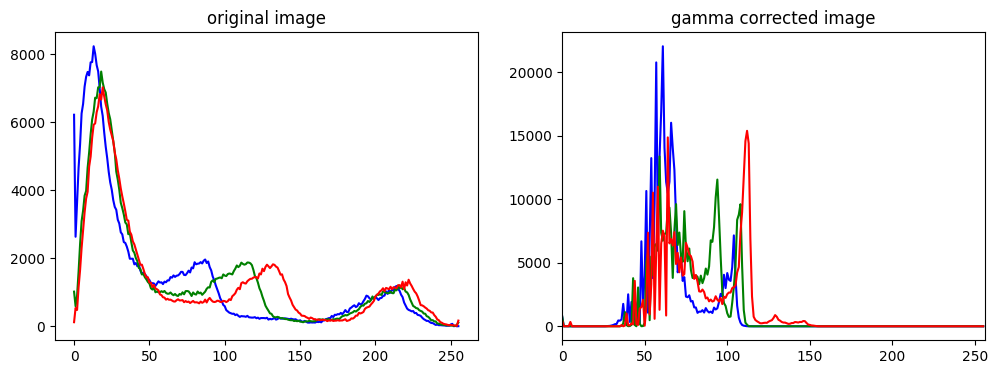

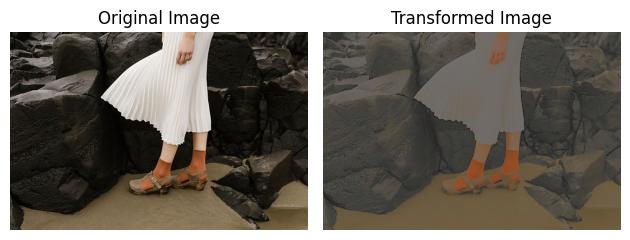

In [25]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

#image in the L*a*b* color space
image= cv.imread('../A01 Intensity Transformations and Neighborhood Filtering/images/highlights_and_shadows.jpg', cv.IMREAD_COLOR)
image_lab = cv.cvtColor(image, cv.COLOR_BGR2Lab)

# get L* channel
L_channel = image_lab[:, :, 0]

#gamma correction 
gamma_value = 0.2
L_corrected = np.power(L_channel / 100.0, gamma_value) * 100.0

#with corrected L* channel
image_lab_corrected = image_lab.copy()
image_lab_corrected[:, :, 0] = L_corrected

# Convert LAB to RGB
image_corrected_rgb = cv.cvtColor(image_lab_corrected, cv.COLOR_Lab2BGR)

#histogram
fig, axar = plt.subplots(1,2,figsize=(12, 4))

color = ('b', 'g', 'r')
for i, c in enumerate(color):
    hist_orig = cv.calcHist([image], [i], None, [256], [0, 256])
    axar[0].plot(hist_orig, color=c)
    hist_gamma = cv.calcHist([image_corrected_rgb], [i], None, [256], [0, 256])
    axar[1].plot(hist_gamma, color=c)
    
axar[0].set_title('original image')
axar[1].set_title('gamma corrected image')
plt.xlim([0, 256])
plt.show()

fig, ax = plt.subplots(1,2)


# Display the original and transformed images
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

image_corrected_rgb = cv.cvtColor(image_corrected_rgb, cv.COLOR_BGR2RGB)
plt.subplot(1, 2, 2)
plt.imshow(image_corrected_rgb)
plt.title('Transformed Image')
plt.axis('off')

plt.tight_layout()
plt.show()





Q4

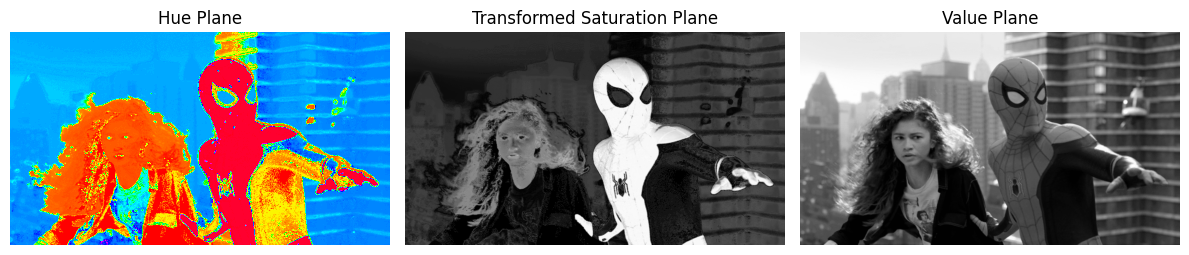

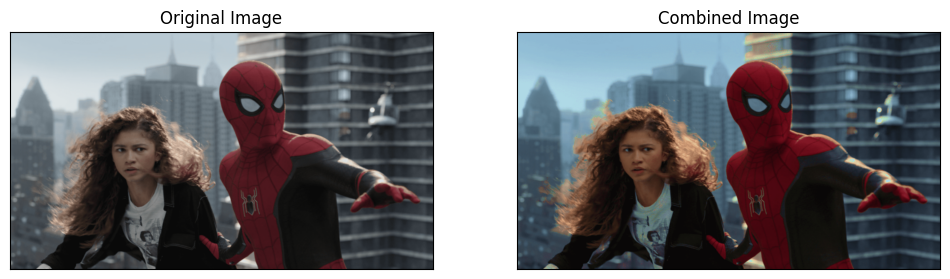

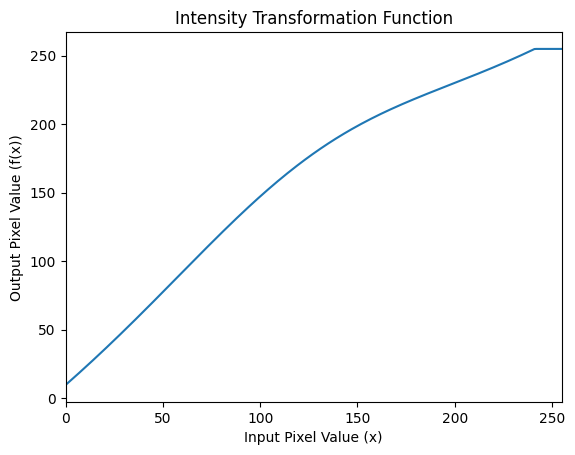

In [74]:
import cv2 as cv2
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    f= x+(a*128)*(np.e)**((-1*(x-128)**2)/(2*sigma**2))  
    r = np.minimum(f,255)
    return r

a=0.4
sigma=70

image= cv2.imread('../A01 Intensity Transformations and Neighborhood Filtering/images/spider.png', cv2.IMREAD_COLOR)
#in HSV space
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

#(a)
# Split the transformed image into hue, saturation, and value planes
hue_plane = image_hsv[:, :, 0]
saturation_plane = image_hsv[:, :, 1]
value_plane = image_hsv[:, :, 2]

#(b)
saturation_plane_transform = f(saturation_plane)
image_hsv[:, :, 1] =saturation_plane_transform

#(d)
image_hsv = cv2.cvtColor(image_hsv, cv2.COLOR_HSV2RGB)

# Display the individual planes
plt.figure(figsize=(12, 4))


plt.subplot(1, 3, 1)
plt.imshow(hue_plane, cmap='hsv')
plt.title('Hue Plane')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(saturation_plane, cmap='gray')
plt.title('Transformed Saturation Plane')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(value_plane, cmap='gray')
plt.title('Value Plane')
plt.axis('off')

plt.tight_layout()
plt.show()





plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.xticks([]), plt.yticks([])

plt.subplot(1, 2, 2)
plt.imshow(image_hsv)
plt.title('Combined Image')
plt.xticks([]), plt.yticks([])

plt.show()

#(e)intensity transformation function
x_range = np.arange(0, 256)  # Range of x values from 0 to 255
y_values = f(x_range)  #corresponding y values using the function

plt.plot(x_range, y_values)
plt.title('Intensity Transformation Function')
plt.xlabel('Input Pixel Value (x)')
plt.ylabel('Output Pixel Value (f(x))')
plt.xlim([0, 255])
plt.show()


Q5

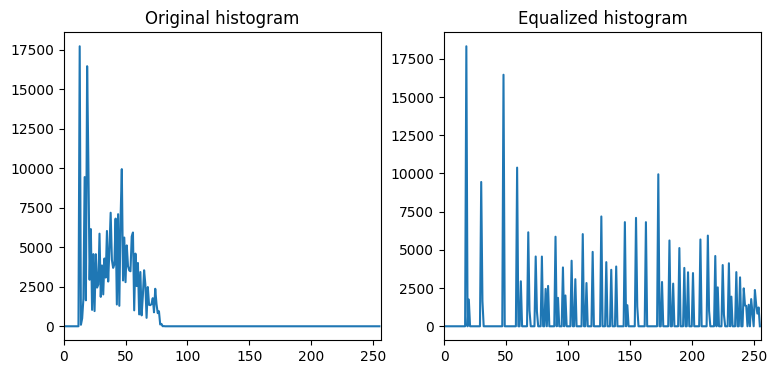

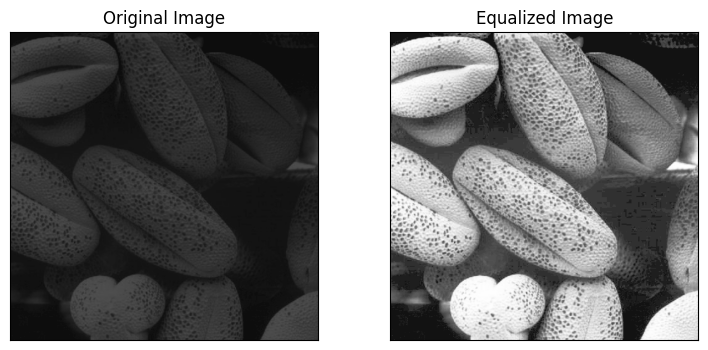

In [31]:
import numpy as np
import cv2 as cv

def hist_eq(image):
    hist = np.zeros(256,dtype=int)
    height,width=image.shape
    for i in range(256):
        hist[i]=np.sum(image==i)

    # cumulative distribution
    c_dis=np.zeros(256,dtype=int)
    c_dis[0]=hist[0]
    for i in range(1,256):
        c_dis[i]=hist[i]+c_dis[i-1]
    
    cdf_norm = c_dis*255/(height*width)
    cdf_norm=np.uint8(cdf_norm)

    eq_image=cdf_norm[image]

    return eq_image

im = cv2.imread('../A01 Intensity Transformations and Neighborhood Filtering/images/shells.tif', cv2.IMREAD_GRAYSCALE)
eq_im= hist_eq(im)

hist_org = cv.calcHist([im], [0], None, [256], [0, 256])
hist_eq = cv.calcHist([eq_im], [0], None, [256], [0, 256])

#show histogram
plt.figure(figsize=(9, 4))
plt.subplot(1, 2, 1)
plt.plot(hist_org)
plt.title('Original histogram')
plt.xlim([0, 256])

plt.subplot(1, 2, 2)
plt.plot(hist_eq)
plt.title('Equalized histogram')
plt.xlim([0, 256])
plt.show()


#show images
plt.figure(figsize=(9, 4))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.xticks([]), plt.yticks([])

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(eq_im, cv2.COLOR_BGR2RGB))
plt.title('Equalized Image')
plt.xticks([]), plt.yticks([])

plt.show()
        
    
            

Q6

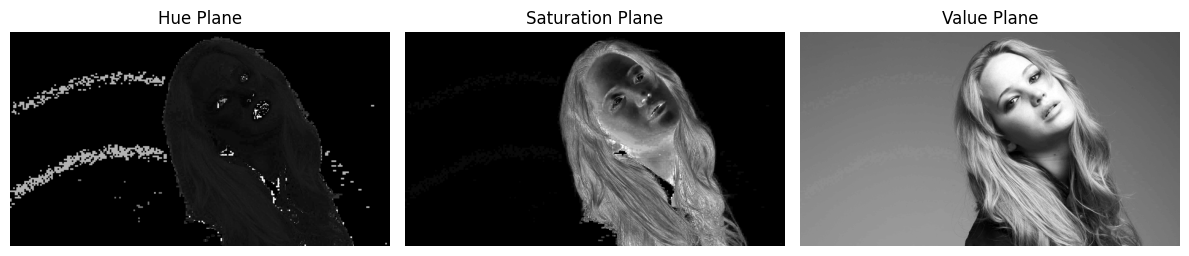

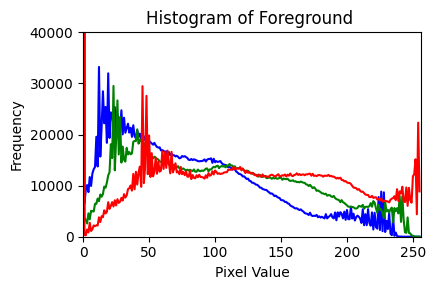

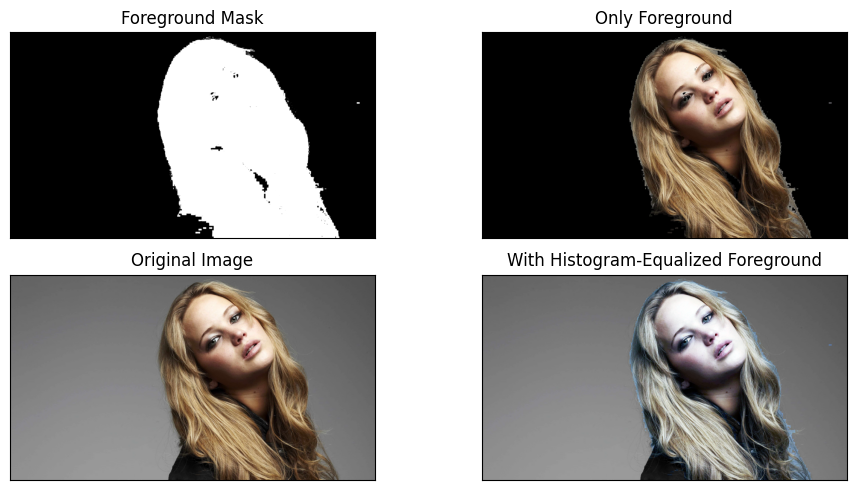

In [83]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# (a) Read the image and convert it to HSV space
image = cv2.imread('../A01 Intensity Transformations and Neighborhood Filtering/images/jeniffer.jpg', cv2.IMREAD_COLOR)
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Split the HSV image into its components
hue_plane = image_hsv[:, :, 0]
saturation_plane = image_hsv[:, :, 1]
value_plane = image_hsv[:, :, 2]

# Display the individual planes
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(hue_plane, cmap='gray')
plt.title('Hue Plane')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(saturation_plane, cmap='gray')
plt.title('Saturation Plane')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(value_plane, cmap='gray')
plt.title('Value Plane')
plt.axis('off')

plt.tight_layout()
plt.show()

# (b) Thresholding to create a foreground mask based on saturation

threshold_value = 12  
_, foreground_mask = cv2.threshold(saturation_plane, threshold_value, 255, cv2.THRESH_BINARY)


#(c),(d) bitwise AND to get the foreground 
foreground = cv2.bitwise_and(image, image, mask=foreground_mask)

#Compute the histogram of the foreground and cumulative distribution
color = ('b', 'g', 'r')
# Plot histogram with ylim
plt.figure(figsize=(8, 3))
plt.subplot(1, 2, 1)  
for i, c in enumerate(color):
    height,width=image.shape[:2]
    hist = cv2.calcHist([foreground], [i], None, [256], [0, 256])
    plt.plot(hist, color=c)
    cum_hist = np.cumsum(hist)
    cdf_norm = cum_hist*255/(height*width)
    cdf_norm=np.uint8(cdf_norm)
plt.xlim([0, 256])
plt.ylim([0, 40000])
plt.title('Histogram of Foreground ')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

#(e) Apply histogram equalization to each channel of the BGR image
equalized_bgr = cv2.merge((
    cv2.equalizeHist(foreground[:, :, 0]),  # Blue channel
    cv2.equalizeHist(foreground[:, :, 1]),  # Green channel
    cv2.equalizeHist(foreground[:, :, 2])   # Red channel
))

#(f)extract the background and add the equalized foreground to the background

# Apply bitwise NOT operation to get the background pixels
background_mask = cv2.bitwise_not(foreground_mask)
#bitwise AND to get the background
background = cv2.bitwise_and(image, image, mask=background_mask)
combined_result = background + equalized_bgr


# Display the foreground ,the original image, the mask, and the result
plt.figure(figsize=(10, 5))
plt.subplot(2, 2, 1)
plt.imshow(foreground_mask, cmap='gray')
plt.title('Foreground Mask')
plt.xticks([]), plt.yticks([])  # Hide ticks


plt.subplot(2, 2, 2)
plt.imshow(cv2.cvtColor(foreground, cv2.COLOR_BGR2RGB))
plt.title('Only Foreground')
plt.xticks([]), plt.yticks([])  # Hide ticks


plt.subplot(2, 2, 3)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.xticks([]), plt.yticks([])  # Hide ticks



plt.subplot(2, 2, 4)
plt.imshow(cv2.cvtColor(combined_result, cv2.COLOR_BGR2RGB))
plt.title('With Histogram-Equalized Foreground')
plt.xticks([]), plt.yticks([])  # Hide ticks
plt.tight_layout()
plt.show()



Q7 (a)

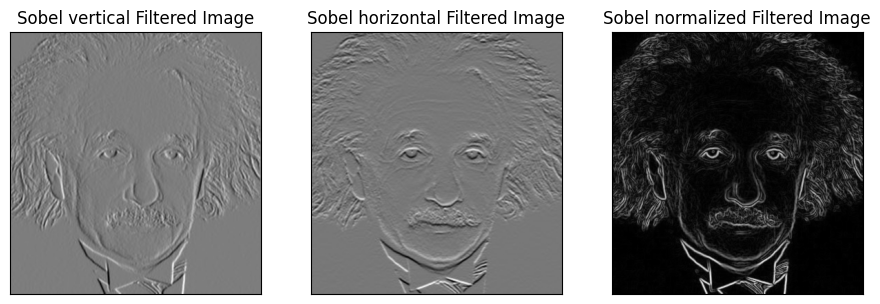

In [45]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


# Load the image
image = cv2.imread('../A01 Intensity Transformations and Neighborhood Filtering/images/einstein.png', cv2.IMREAD_COLOR)

# Define the Sobel kernel
sobel_x = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
sobel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

# using filter2D
sobel_x_filtered = cv2.filter2D(image, cv2.CV_64F, sobel_x)
sobel_y_filtered = cv2.filter2D(image, cv2.CV_64F, sobel_y)

# Combine the x and y 
sobel_combined = np.sqrt(sobel_x_filtered**2 + sobel_y_filtered**2)

# Convert back to uint8 and normalize
sobel_x_filtered = cv2.normalize(sobel_x_filtered, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
sobel_y_filtered = cv2.normalize(sobel_y_filtered, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
sobel_combined = cv2.normalize(sobel_combined, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

# Display the filtered image
plt.figure(figsize=(11, 8))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(sobel_x_filtered, cv2.COLOR_BGR2RGB))
plt.title('Sobel vertical Filtered Image')
plt.xticks([]), plt.yticks([])  # Hide ticks

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(sobel_y_filtered, cv2.COLOR_BGR2RGB))
plt.title('Sobel horizontal Filtered Image')
plt.xticks([]), plt.yticks([])  # Hide ticks

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(sobel_combined, cv2.COLOR_BGR2RGB))
plt.title('Sobel normalized Filtered Image')
plt.xticks([]), plt.yticks([])  # Hide ticks

plt.show()


Q7 (b)

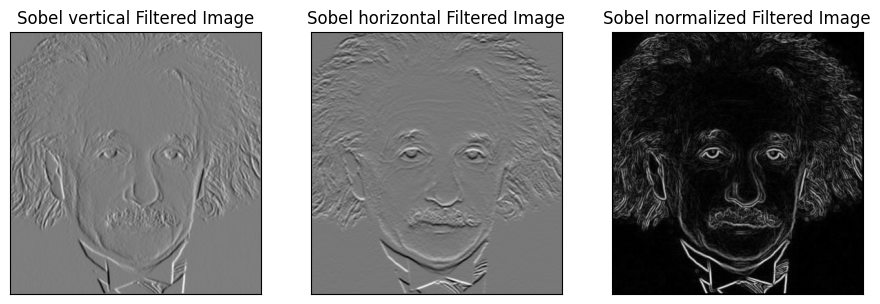

In [47]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


# Load the image
image = cv2.imread('../A01 Intensity Transformations and Neighborhood Filtering/images/einstein.png', cv2.IMREAD_GRAYSCALE)

# Define the Sobel kernel
sobel_x = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
sobel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

def sobel_filter( image , kernel ) :
    # Get dimensions of image and kernel
    height, width = image.shape
    kernel_size = kernel.shape[0]
    k_hh, k_hw = kernel_size // 2, kernel_size // 2

    # Create an empty result array
    result = np.zeros_like(image, 'float')

    # Loop through each pixel in the image
    for i in range(k_hh, height - k_hh):
        for j in range(k_hw, width - k_hw):
            # Apply the convolution operation
            convolution_result = np.dot(image[i - k_hh:i + k_hh + 1, j - k_hw:j + k_hw + 1].flatten(), kernel.flatten())
            result[i, j] = convolution_result
    return result 

sobel_x_filtered = sobel_filter(image, sobel_x)
sobel_y_filtered = sobel_filter(image, sobel_y)
sobel_combined = np.sqrt(sobel_x_filtered**2 + sobel_y_filtered**2)

# Convert back to uint8 and normalize
sobel_x_filtered = cv2.normalize(sobel_x_filtered, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
sobel_y_filtered = cv2.normalize(sobel_y_filtered, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
sobel_combined = cv2.normalize(sobel_combined, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

# Display the filtered image
plt.figure(figsize=(11, 8))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(sobel_x_filtered, cv2.COLOR_BGR2RGB))
plt.title('Sobel vertical Filtered Image')
plt.xticks([]), plt.yticks([])  # Hide ticks

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(sobel_y_filtered, cv2.COLOR_BGR2RGB))
plt.title('Sobel horizontal Filtered Image')
plt.xticks([]), plt.yticks([])  # Hide ticks

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(sobel_combined, cv2.COLOR_BGR2RGB))
plt.title('Sobel normalized Filtered Image')
plt.xticks([]), plt.yticks([])  # Hide ticks

plt.show()

Q7 (c)

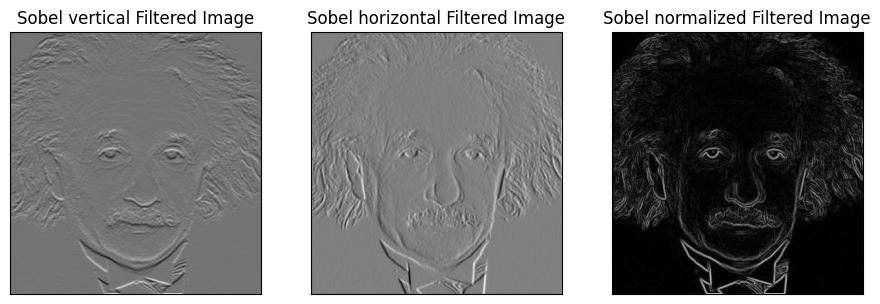

In [61]:
#using matrix multiplication property do sobel filter while using kernel as matrix multiplication
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('../A01 Intensity Transformations and Neighborhood Filtering/images/einstein.png', cv2.IMREAD_GRAYSCALE)


# Define separable filters
filter_row = np.array([1, 2, 1])
filter_column = np.array([1, 0, -1])

# Apply the separable convolution without normalizing
sobel_x_filtered = cv2.sepFilter2D(image, cv2.CV_64F, filter_row, filter_column, delta=0, borderType=cv2.BORDER_CONSTANT)
sobel_y_filtered = cv2.sepFilter2D(image, cv2.CV_64F, filter_column, filter_row, delta=0, borderType=cv2.BORDER_CONSTANT)
sobel_combined = np.sqrt(sobel_x_filtered**2 + sobel_y_filtered**2)

# sobel_combined = cv2.normalize(sobel_combined, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
sobel_x_filtered = cv2.normalize(sobel_x_filtered, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
sobel_y_filtered = cv2.normalize(sobel_y_filtered, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
sobel_combined = cv2.normalize(sobel_combined, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)


# Display the filtered image
plt.figure(figsize=(11, 8))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(sobel_x_filtered, cv2.COLOR_BGR2RGB))
plt.title('Sobel vertical Filtered Image')
plt.xticks([]), plt.yticks([])  # Hide ticks

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(sobel_y_filtered, cv2.COLOR_BGR2RGB))
plt.title('Sobel horizontal Filtered Image')
plt.xticks([]), plt.yticks([])  # Hide ticks

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(sobel_combined, cv2.COLOR_BGR2RGB))
plt.title('Sobel normalized Filtered Image')
plt.xticks([]), plt.yticks([])  # Hide ticks

plt.show()



Q8

Normalized SSD (Nearest Neighbor): 120.33522810570987
Normalized SSD (Bilinear Interpolation): 130.1834548611111


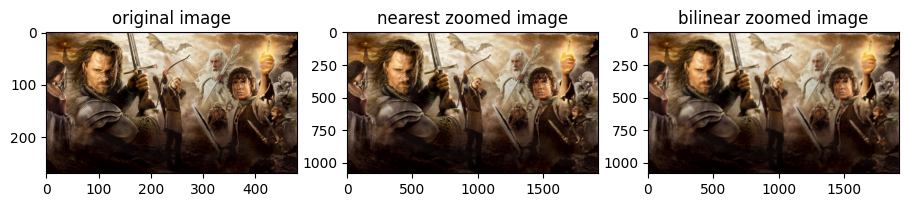

In [57]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the image
original_image = cv.imread("../A01 Intensity Transformations and Neighborhood Filtering/images/zooming/im01small.png")
zoomed_out_image = cv.imread("../A01 Intensity Transformations and Neighborhood Filtering/images/zooming/im01.png")


scale_factor = 4

def zoom_image(img,scale,transform):
    rows, cols= img.shape[:2]
    new_rows=int(rows*scale)
    new_cols=int(cols*scale)
    new_img=np.zeros((new_rows,new_cols,3),dtype=img.dtype)
    for i in range(new_rows):
        for j in range(new_cols):
            if(transform=='nearest'):
                new_img[i,j]=img[min(rows-1,round(i/scale)),min(cols-1,round(j/scale))]
            elif(transform=='bilinear'):
                m=i/scale
                n=j/scale
                
                x=m-int(m)
                y=n-int(n)
                v1=y*img[min(rows-1,(int(m)+1)),min(int(n),cols-1)] + (1-y)*img[min(rows-1,int(m)),min(cols-1,int(n))]
                v2=y*img[min(rows-1,(int(m)+1)),min((int(n)+1),cols-1)] + (1-y)*img[min(int(m),rows-1),min((int(n)+1),cols-1)]
                new_img[i,j]=(1-x)*v1+x*v2

    return new_img

zoomed_nearest=zoom_image(original_image,scale_factor,'nearest')
zoomed_bilinear=zoom_image(original_image,scale_factor,'bilinear')



ssd_nearest = np.sum((zoomed_nearest- zoomed_out_image) ** 2) /np.prod(zoomed_out_image.shape[:2])
ssd_bilinear = np.sum((zoomed_bilinear - zoomed_out_image) ** 2) / np.prod(zoomed_out_image.shape[:2])

print("Normalized SSD (Nearest Neighbor):", ssd_nearest)
print("Normalized SSD (Bilinear Interpolation):", ssd_bilinear)
#show image with axis
plt.figure(figsize=(11, 8))
plt.subplot(1, 3, 1)
plt.imshow(cv.cvtColor(original_image, cv.COLOR_BGR2RGB))
plt.title('original image')

plt.subplot(1, 3, 2)
plt.imshow(cv.cvtColor(zoomed_nearest, cv.COLOR_BGR2RGB))
plt.title('nearest zoomed image')

plt.subplot(1, 3, 3)
plt.imshow(cv.cvtColor(zoomed_bilinear, cv.COLOR_BGR2RGB))
plt.title('bilinear zoomed image')
plt.show()



Q9

(817, 544)


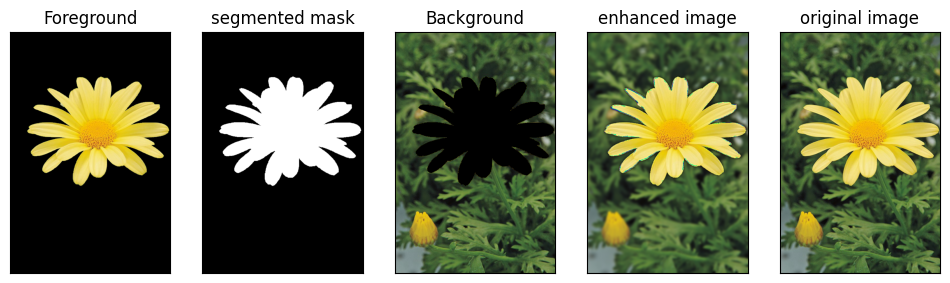

In [87]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('../A01 Intensity Transformations and Neighborhood Filtering/images/flower.png', cv2.IMREAD_COLOR)

# Create an initial mask (e.g., using a bounding box)
mask = np.zeros(image.shape[:2], dtype=np.uint8)
image_size = image.shape[:2]
print(image_size)
rect = (50, 140, 490, 400)  # Bounding box around the flower
cv2.grabCut(image, mask, rect, None, None, 5, cv2.GC_INIT_WITH_RECT)

# Create a binary mask from the grabCut result
mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')

# Create a copy of the image to draw the bounding box
# image_with_bbox = image.copy()
# cv2.rectangle(image_with_bbox, (rect[0], rect[1]), (rect[0] + rect[2], rect[1] + rect[3]), (0, 255, 0), 2)

# # Create the segmented foreground and background images
foreground_image = image * mask2[:, :, np.newaxis]
background_image = image * (1 - mask2[:, :, np.newaxis])

enhanced = foreground_image + cv2.GaussianBlur(background_image, (19, 19), 0)


# Display the results
plt.figure(figsize=(12, 9))

plt.subplot(1, 5, 1)
plt.imshow(cv2.cvtColor(foreground_image, cv2.COLOR_BGR2RGB))
plt.title('Foreground')
plt.xticks([]), plt.yticks([])

plt.subplot(1, 5, 2)
plt.imshow(mask2, cmap='gray')
plt.title('segmented mask')
plt.xticks([]), plt.yticks([])

plt.subplot(1, 5, 3)
plt.imshow(cv2.cvtColor(background_image, cv2.COLOR_BGR2RGB))
plt.title('Background')
plt.xticks([]), plt.yticks([])



plt.subplot(1, 5, 4)
plt.imshow(cv2.cvtColor(enhanced, cv2.COLOR_BGR2RGB))
plt.title('enhanced image')
plt.xticks([]), plt.yticks([])

plt.subplot(1, 5, 5)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('original image')
plt.xticks([]), plt.yticks([])

plt.show()
